In [115]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [116]:
from dragonn.utils import one_hot_from_bed 
from dragonn.vis import plot_seq_importance 
import numpy as np 
import pandas as pd
ref_fasta="/mnt/data/annotations/by_release/hg19/male.hg19.fa"


## BCL11A

In [120]:
gkmexplanations=pd.read_csv('gkm_explain/gkm_explain_BCL11A.txt',header=None,sep='\t')
dl_shuffledref_z_reg=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/regression_model/deepLIFT_interpretation_10shuffled_ref/BCL11A.deepLIFT.shuffled.ref.10.npz",allow_pickle=True)
dl_zeroref_z_reg=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/regression_model/deepLIFT_interpretation_zero_ref/BCL11A.deepLIFT.zero.ref.npz",allow_pickle=True)
gradinput_z_reg=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/regression_model/BCL11A.input_grad.npz")

In [121]:
dl_shuffledref_z_class=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/classification_model/BCL11A.deepLIFT.shuffled.ref.10.npz",allow_pickle=True)
dl_zeroref_z_class=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/classification_model/BCL11A.deepLIFT.zero.ref.npz",allow_pickle=True)
gradinput_z_class=np.load("/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/classification_model/BCL11A.input_grad.npz")

In [123]:
bed_entries_shuffledref=dl_shuffledref_z_reg['bed_entries']
dl_shuffledref_reg=dl_shuffledref_z_reg['deeplift_scores']
dl_shuffledref_class=dl_shuffledref_z_class['deeplift_scores']
dl_zeroref_reg=dl_zeroref_z_reg['deeplift_scores']
dl_zeroref_class=dl_zeroref_z_class['deeplift_scores']
gradinput_reg=gradinput_z_reg['deeplift_scores']
gradinput_class=gradinput_z_class['deeplift_scores']

In [127]:
from matplotlib import pyplot as plt
from dragonn.vis import * 
def plot_seq_importance(grads, x, xlim=None, ylim=None, figsize=(25, 3),title="",snp_pos=0):
    """Plot  sequence importance score                                                                                                                                   
                                                                                                                                                                         
    Args:                                                                                                                                                                
      grads: either deeplift or gradientxinput score matrix                                                                                                              
      x: one-hot encoded DNA sequence                                                                                                                                    
      xlim: restrict the plotted xrange                                                                                                                                  
      figsize: matplotlib figure size                                                                                                                                    
    """
    f,axes=plt.subplots(1,dpi=80,figsize=figsize)
    grads=grads.squeeze()
    x=x.squeeze()
    seq_len = x.shape[0]
    vals_to_plot=grads*x
    if xlim is None:
        xlim = (0, seq_len)
    if ylim is None:
        ylim= (np.amin(vals_to_plot),np.amax(vals_to_plot))
    axes=plot_bases_on_ax(vals_to_plot,axes,show_ticks=True)
    plt.xticks(list(range(xlim[0], xlim[1], 5)))
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_title(title,fontsize=20)
    axes.axvline(x=snp_pos, color='k', linestyle='--')
    plt.show()
    #return axes



In [128]:
def plot_vals(i): 
    bed_entry=bed_entries_zeroref[i]
    onehotseq=one_hot_from_bed([bed_entry],ref_fasta)
    cur_gkmexplanation=np.array([[float(j) for j in i.split(',')] for i in gkmexplanations.iloc[i][2].split(';')])
    ax1=plot_seq_importance(cur_gkmexplanation,onehotseq.squeeze(),title="GKMexplain:"+str(bed_entry))
    cur_dlshuffledref_reg=dl_shuffledref_reg[i]
    ax2=plot_seq_importance(cur_dlshuffledref_reg.squeeze()[375:625],onehotseq,title="Reg. DeepLIFT 10 shuf ref:"+str(bed_entry))
    cur_dlzeroref_reg=dl_zeroref_reg[i]
    ax3=plot_seq_importance(cur_dlzeroref_reg.squeeze()[375:625],onehotseq,title="Reg.DeepLIFT 0 ref:"+str(bed_entry))
    cur_gradinput_reg=gradinput_reg[i]
    ax4=plot_seq_importance(cur_gradinput_reg.squeeze()[375:625],onehotseq,title="Reg.GradXInput:"+str(bed_entry))
    cur_dlshuffledref_class=dl_shuffledref_class[i]
    ax5=plot_seq_importance(cur_dlshuffledref_class.squeeze()[375:625],onehotseq,title="Class. DeepLIFT 10 shuf ref:"+str(bed_entry))    
    cur_dlzeroref_class=dl_zeroref_class[i]
    ax6=plot_seq_importance(cur_dlzeroref_class.squeeze()[375:625],onehotseq,title="Class. DeepLIFT 0 ref:"+str(bed_entry))    
    cur_gradinput_class=gradinput_class[i]
    ax7=plot_seq_importance(cur_gradinput_class.squeeze()[375:625],onehotseq,title="Class. GradXInput:"+str(bed_entry))    
    return ax1,ax2,ax3,ax4,ax5,ax6,ax7


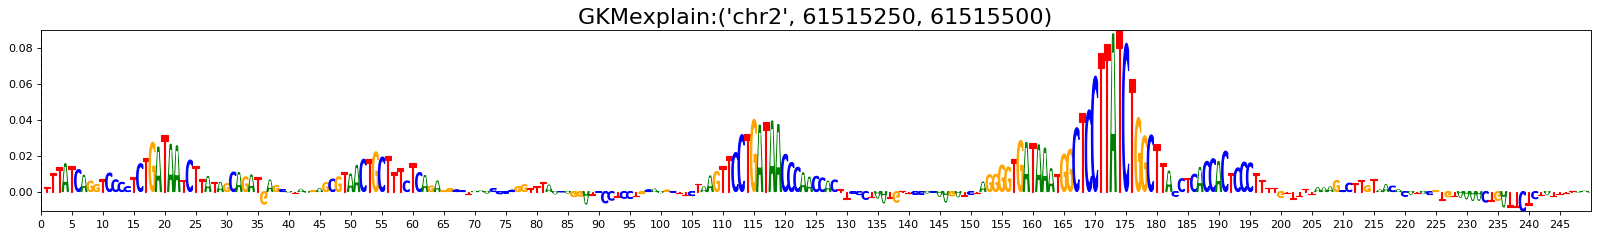

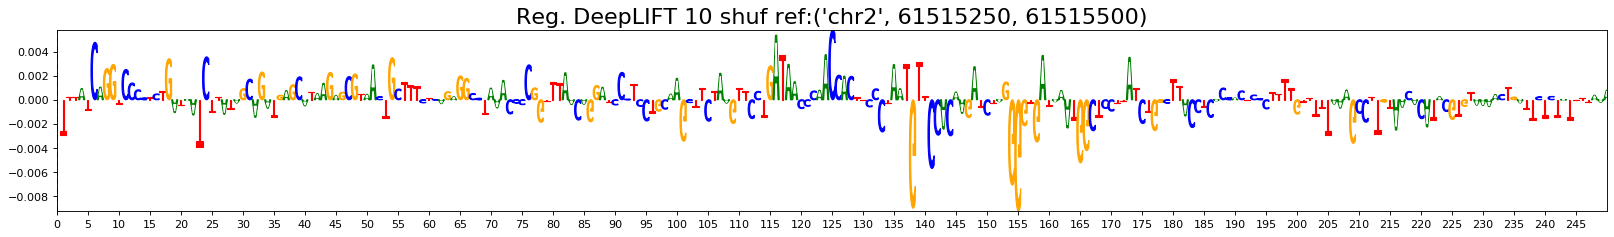

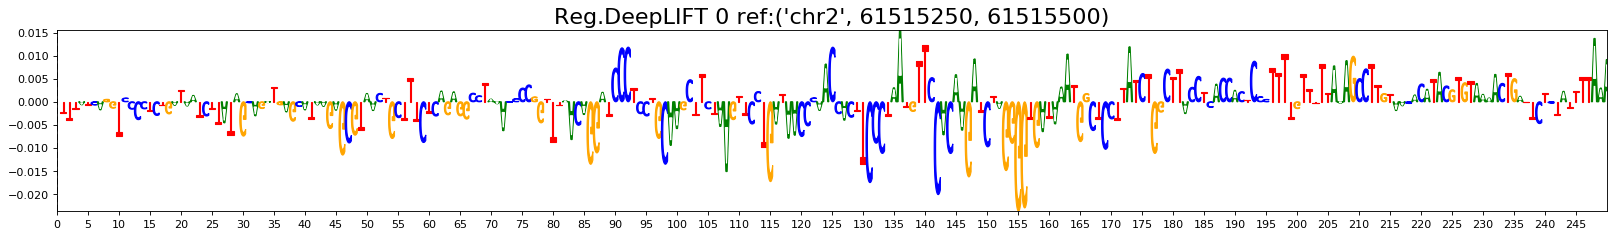

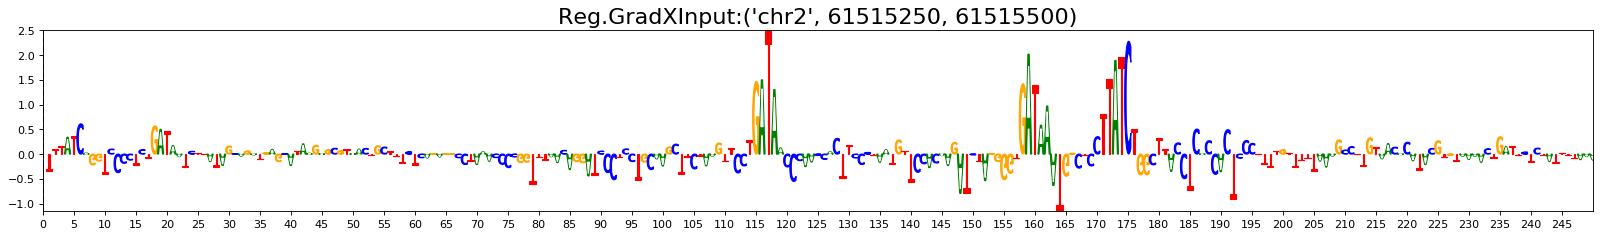

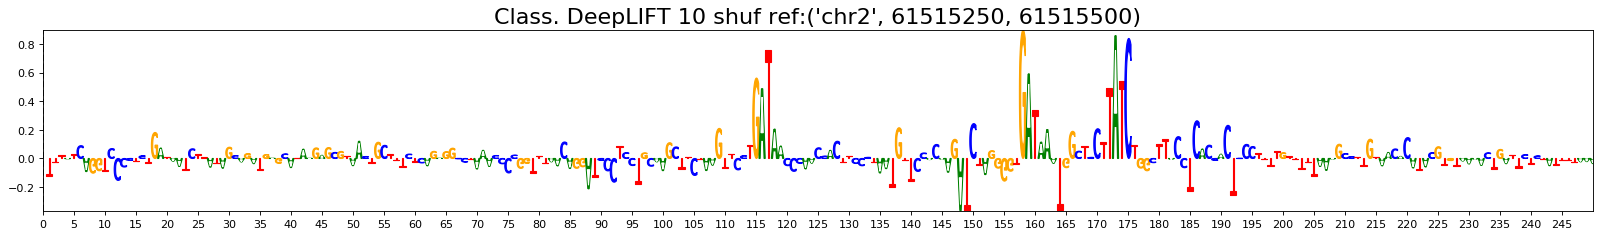

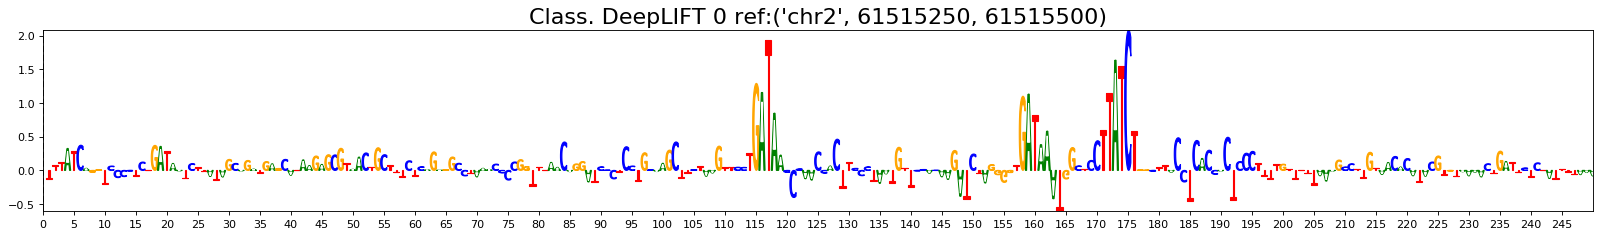

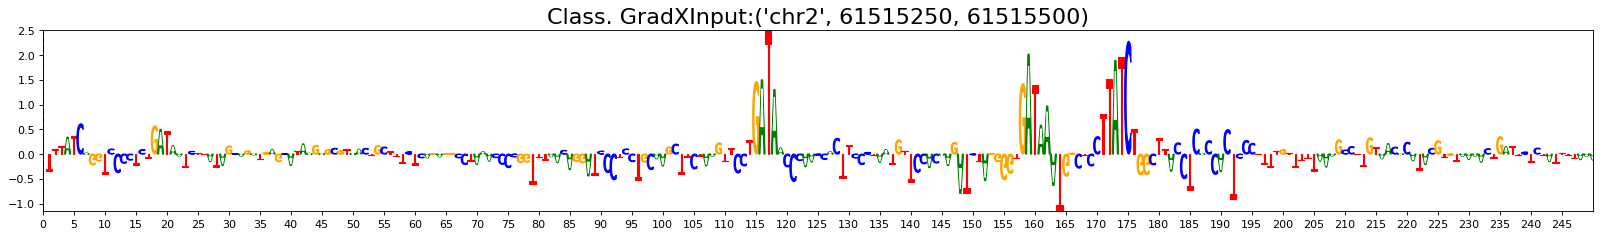

In [130]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(6939)

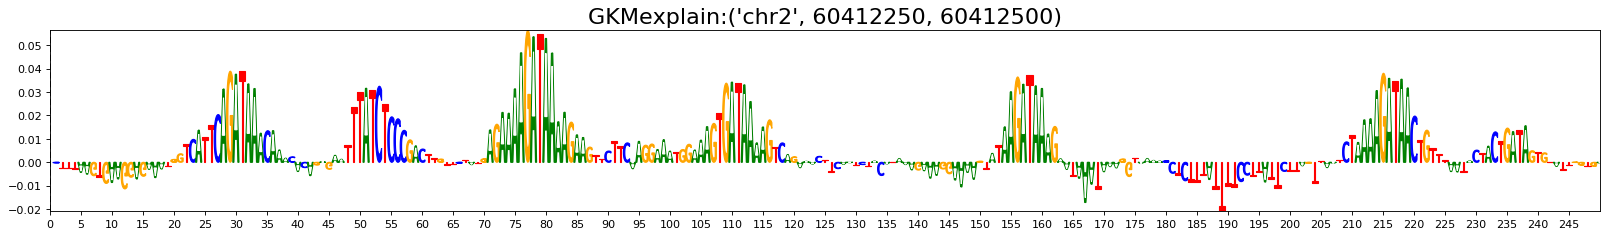

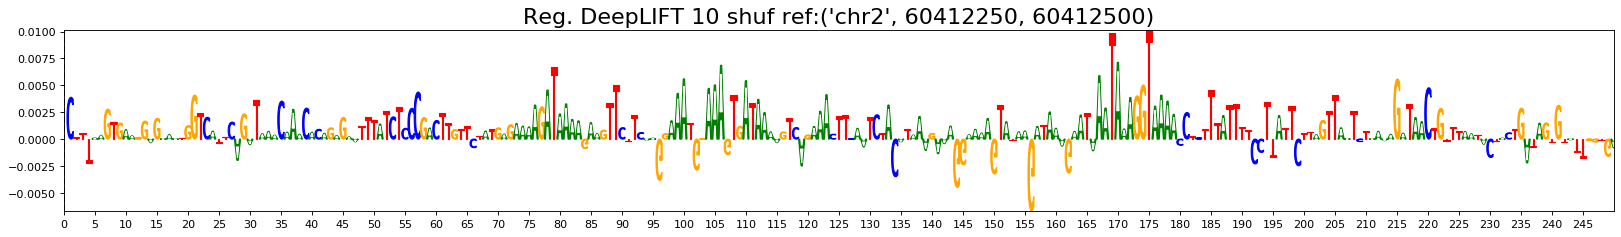

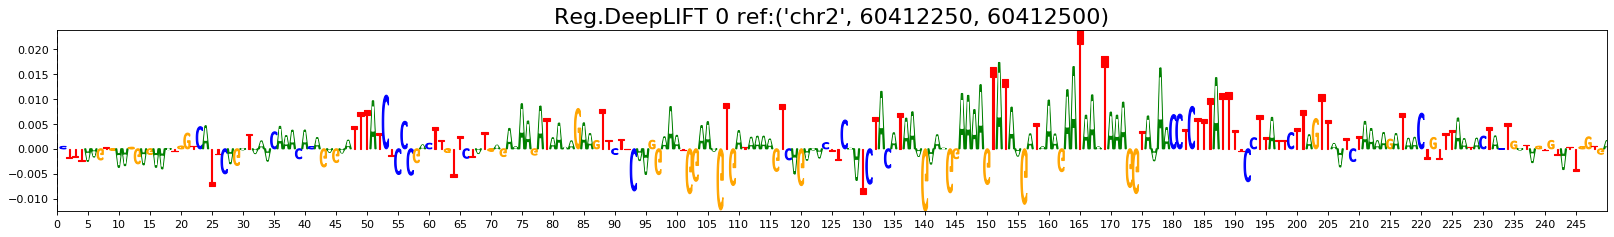

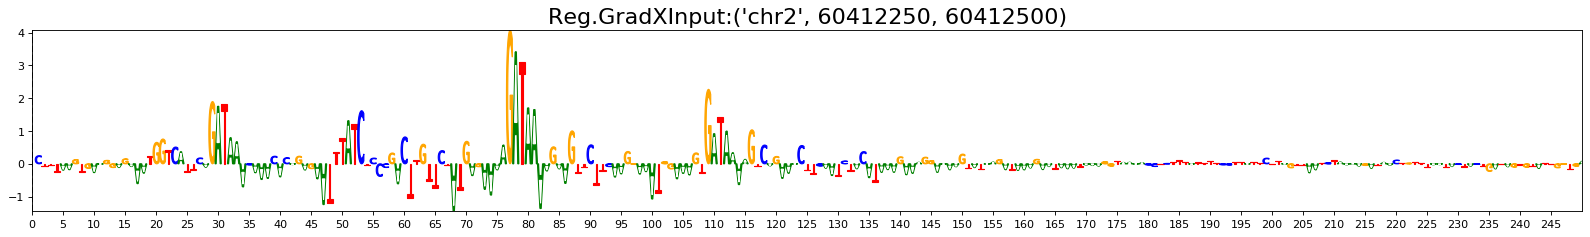

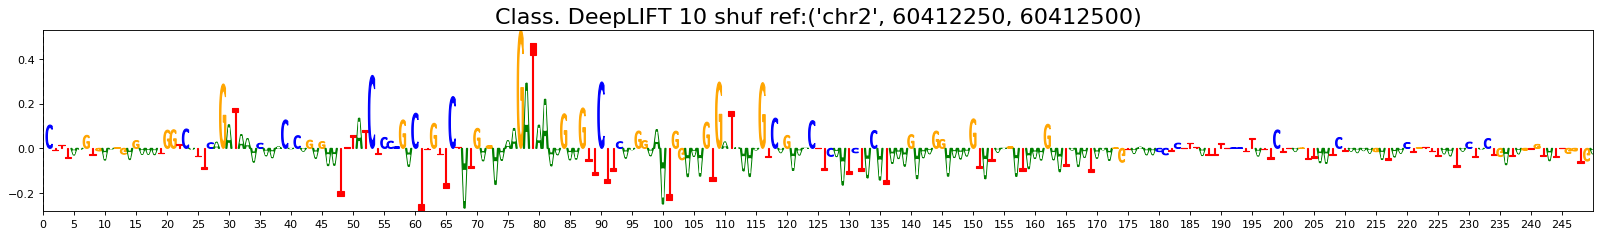

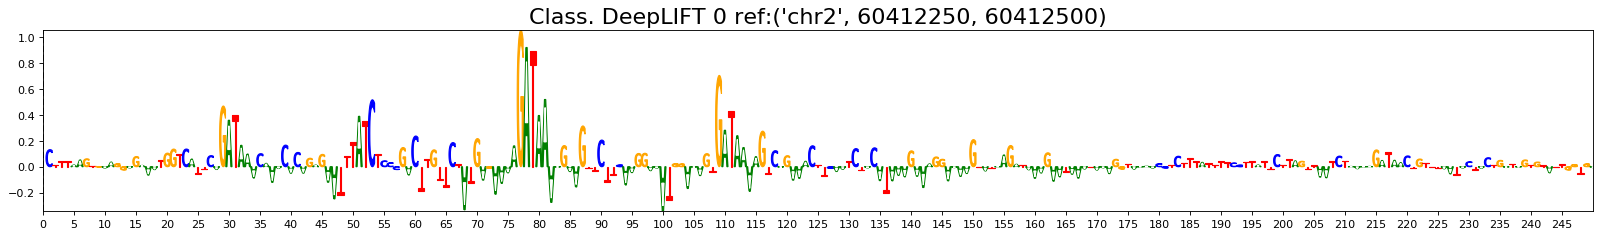

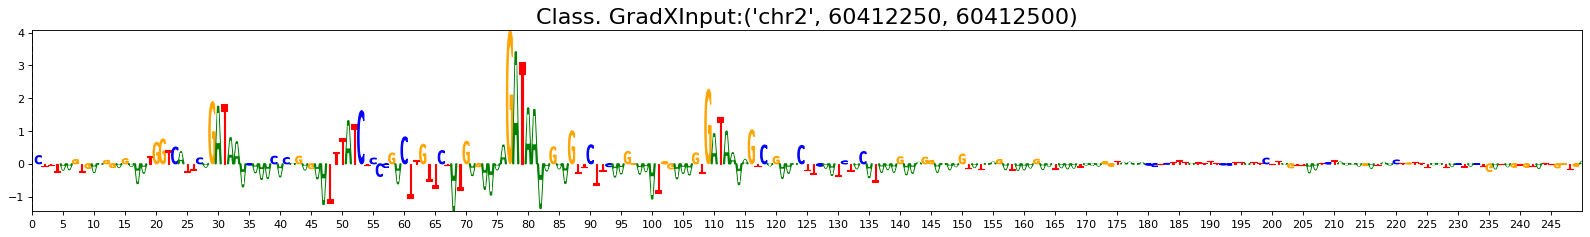

In [131]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(2527)

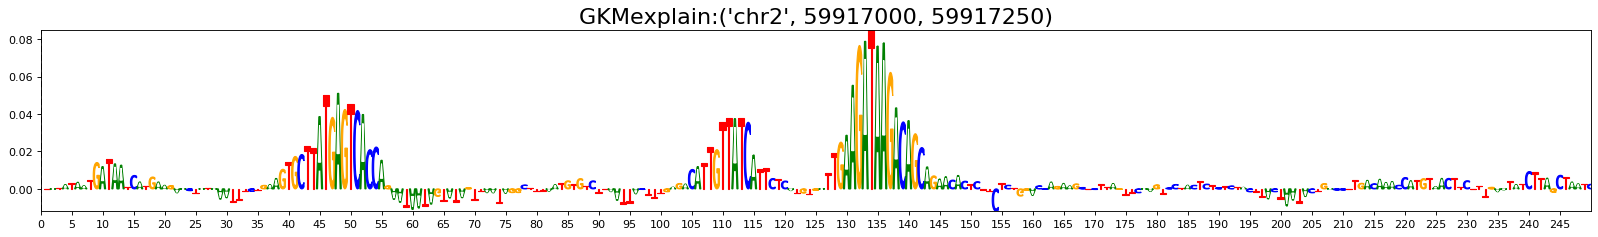

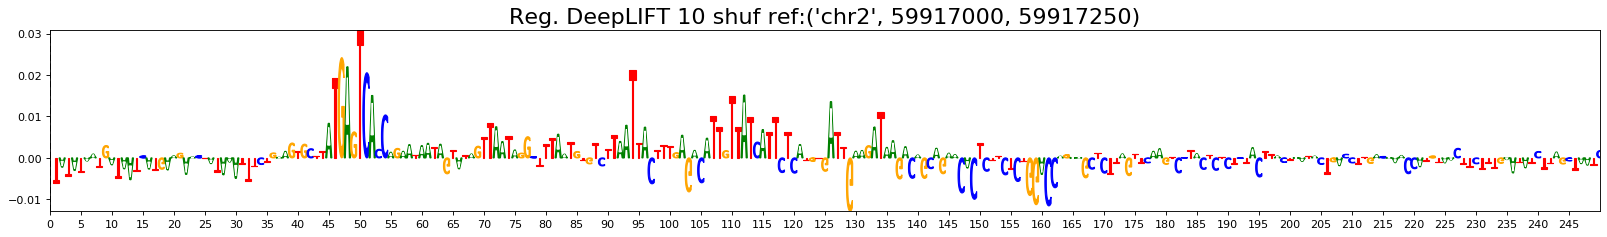

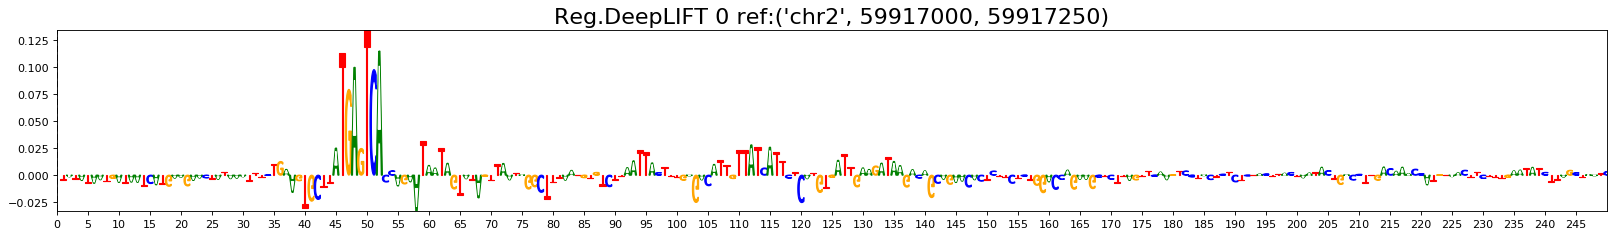

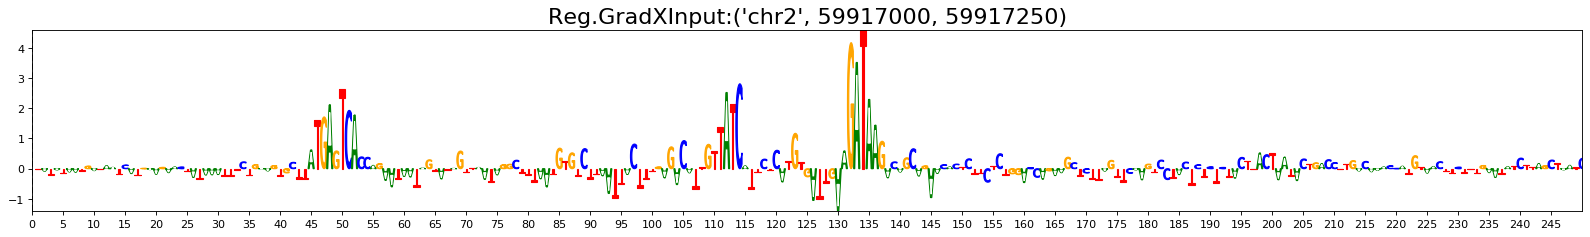

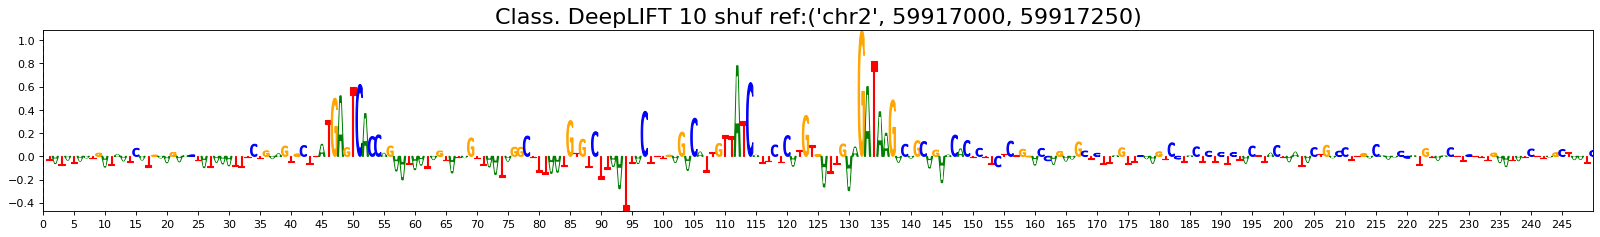

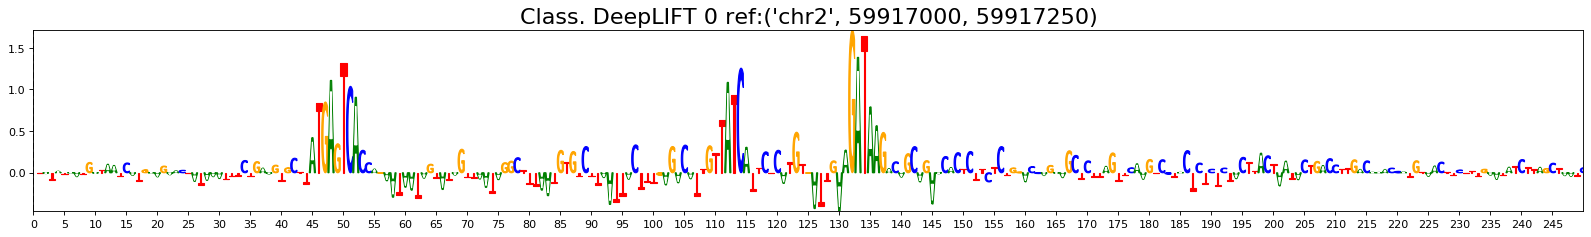

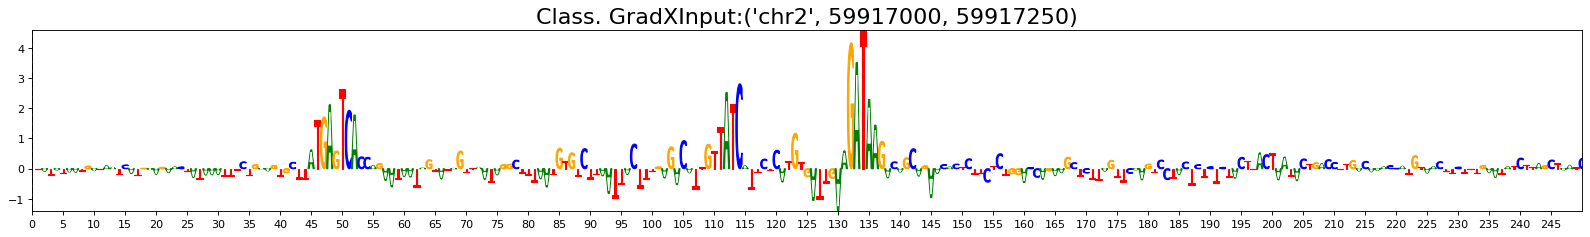

In [132]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(546)

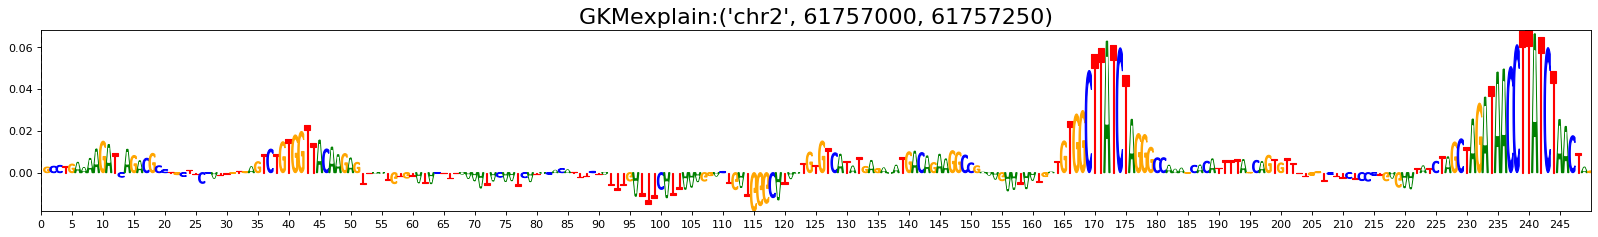

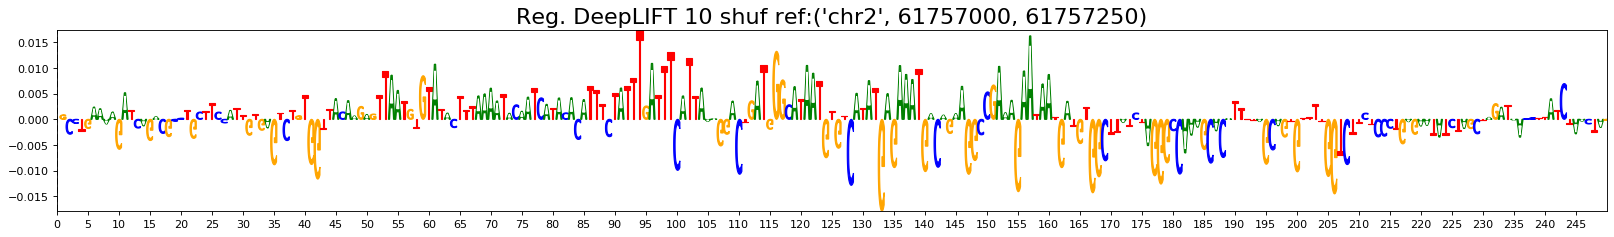

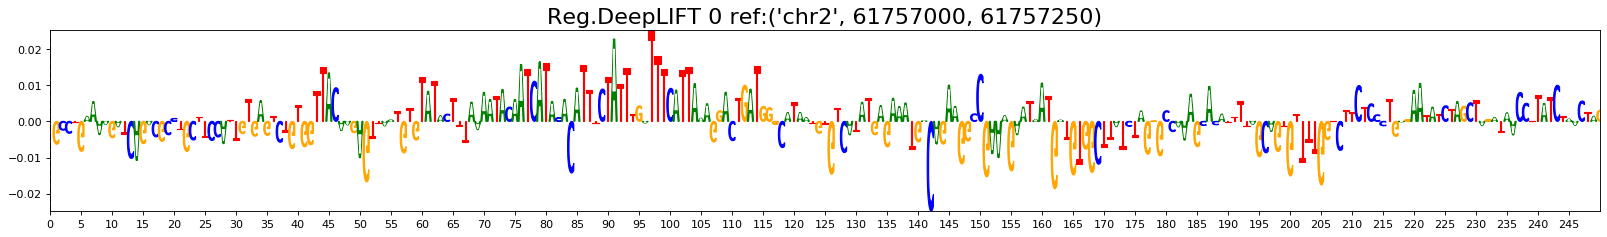

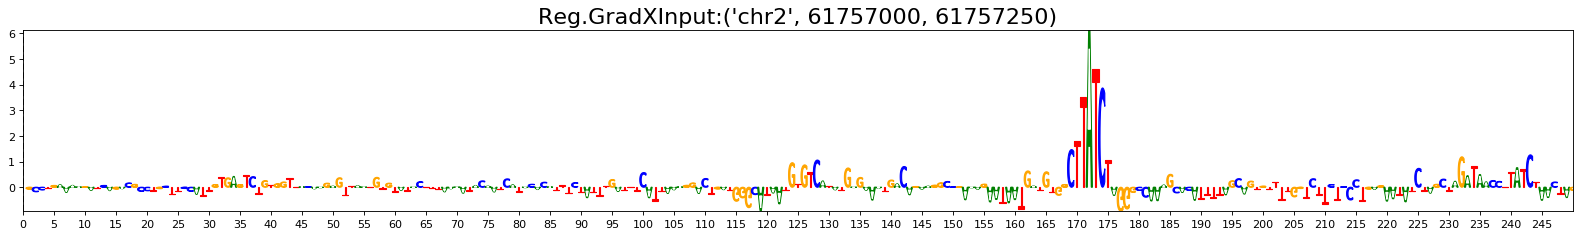

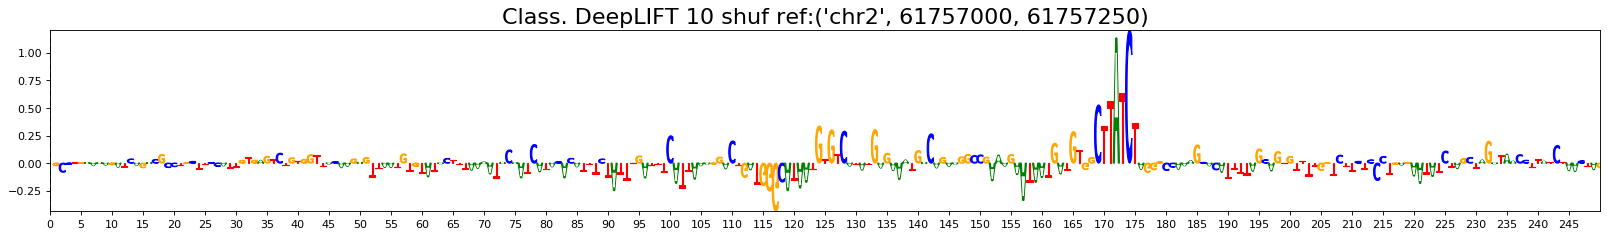

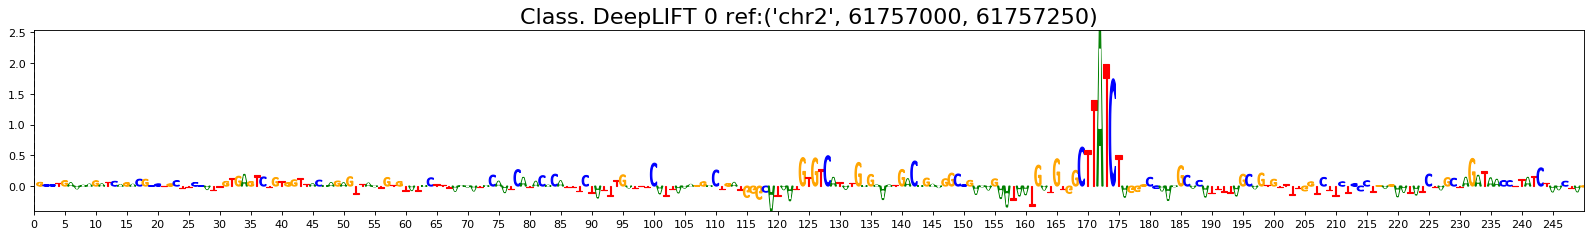

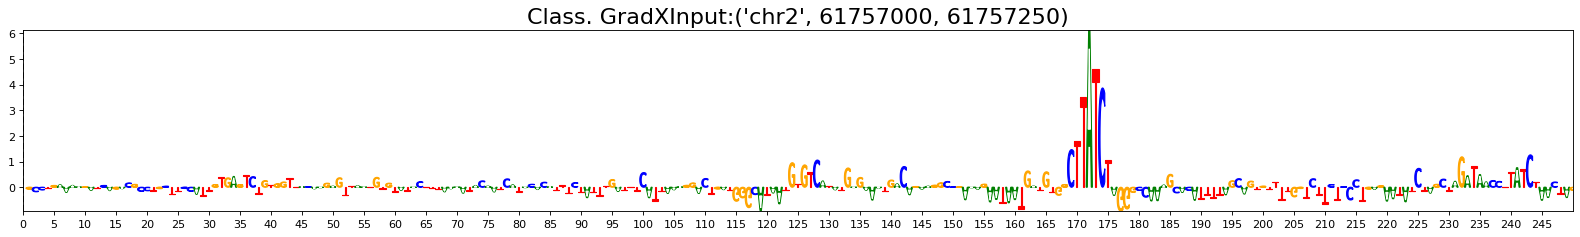

In [133]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(7906)

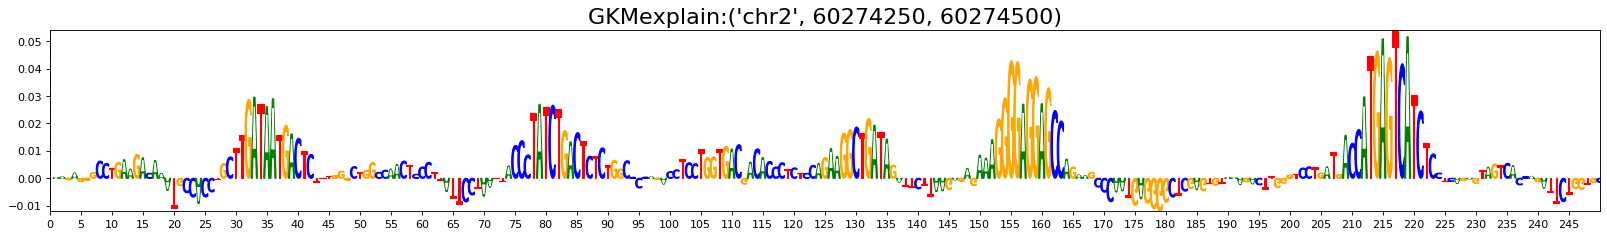

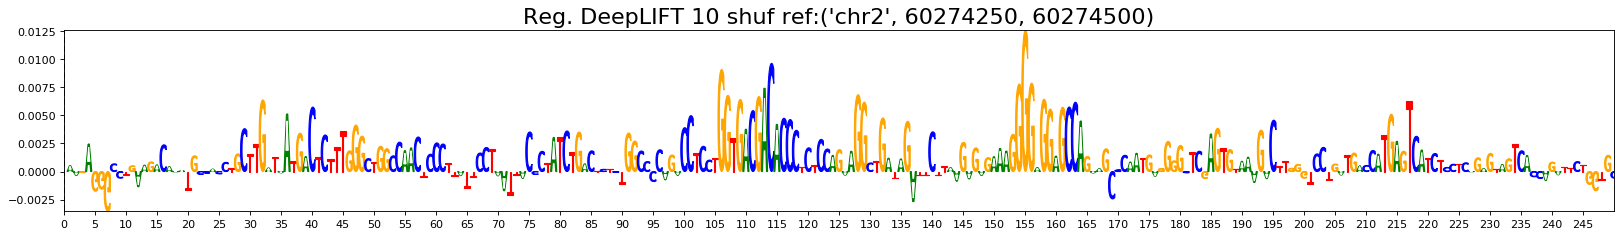

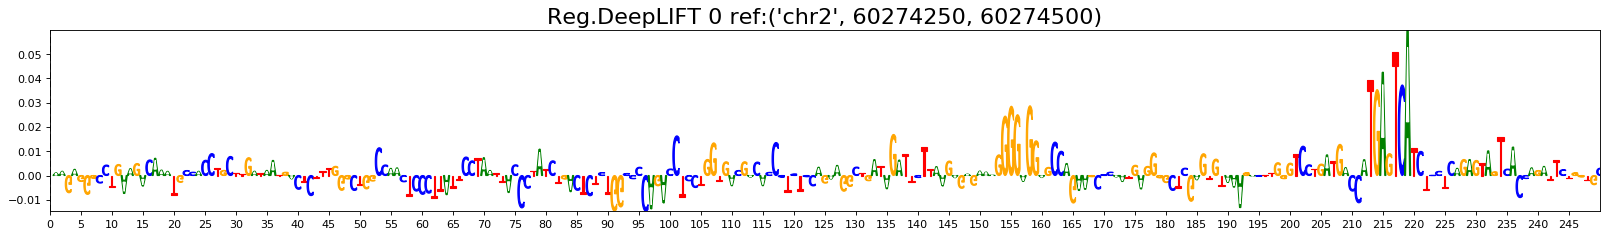

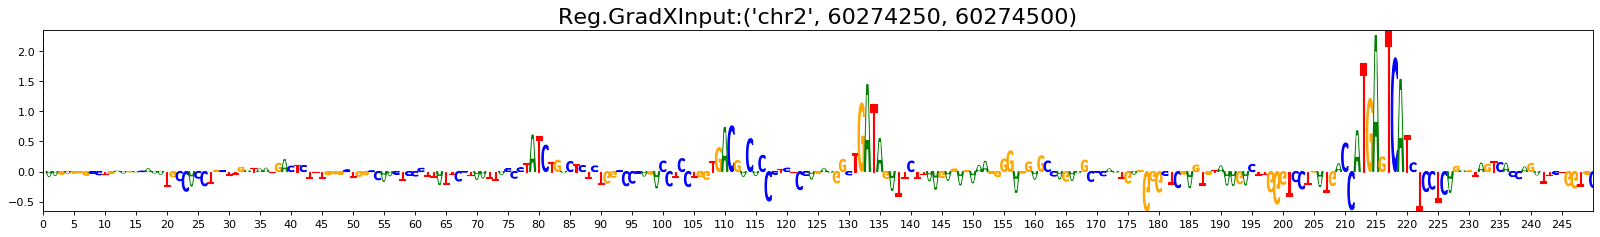

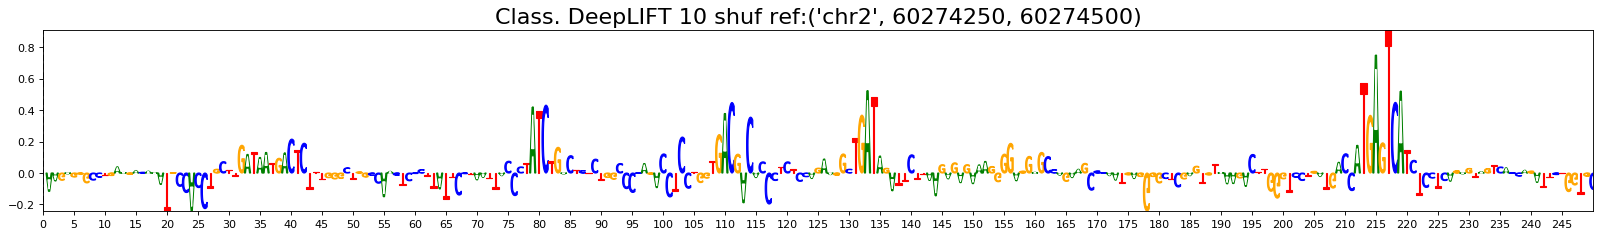

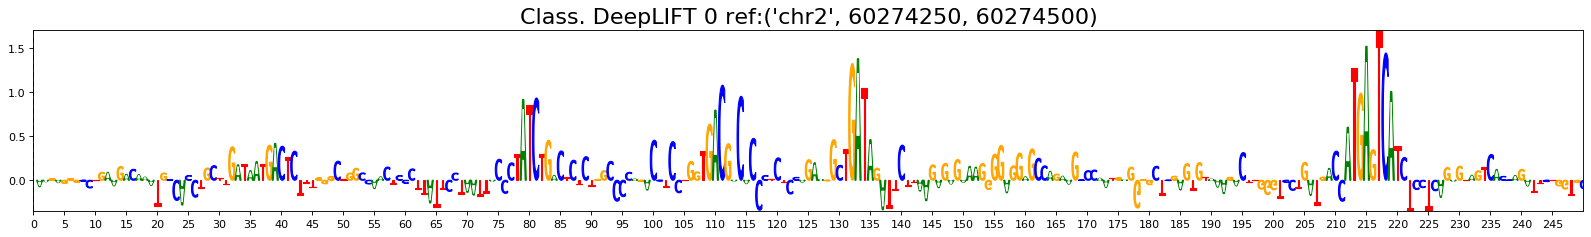

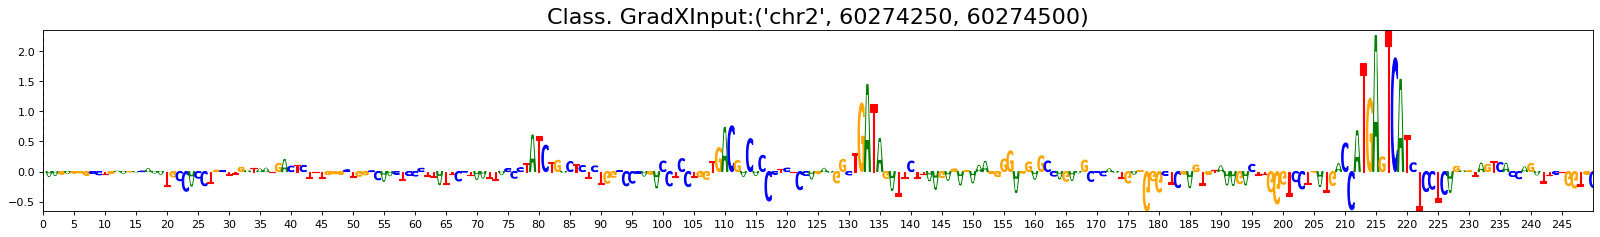

In [134]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(1975)

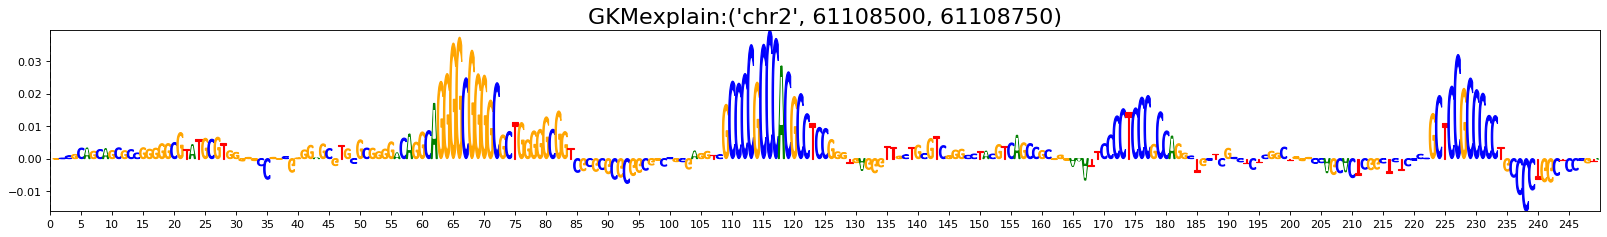

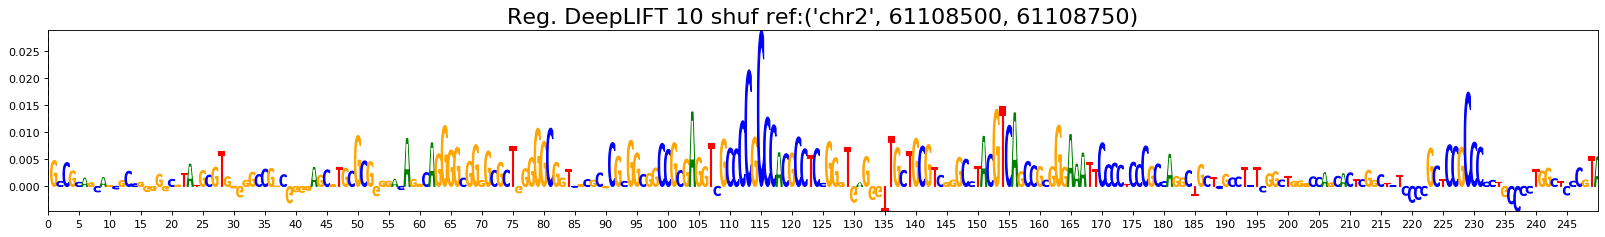

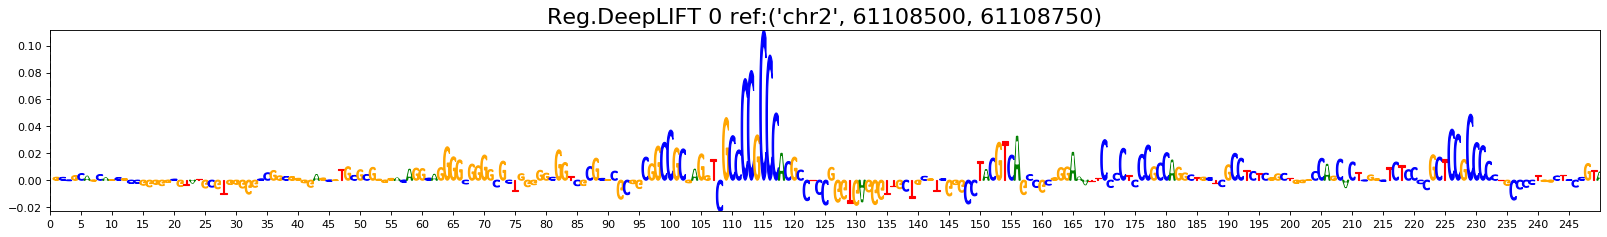

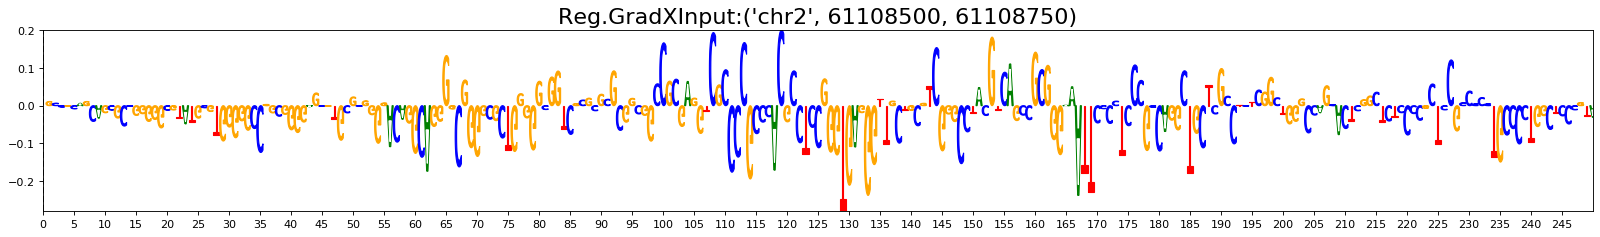

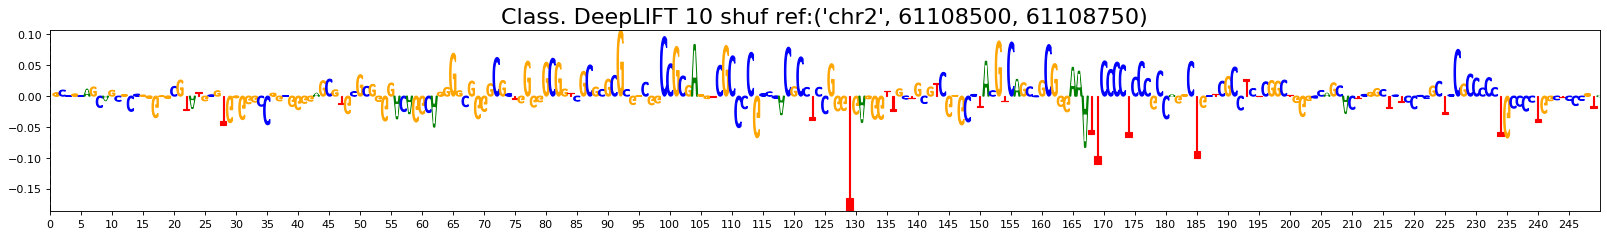

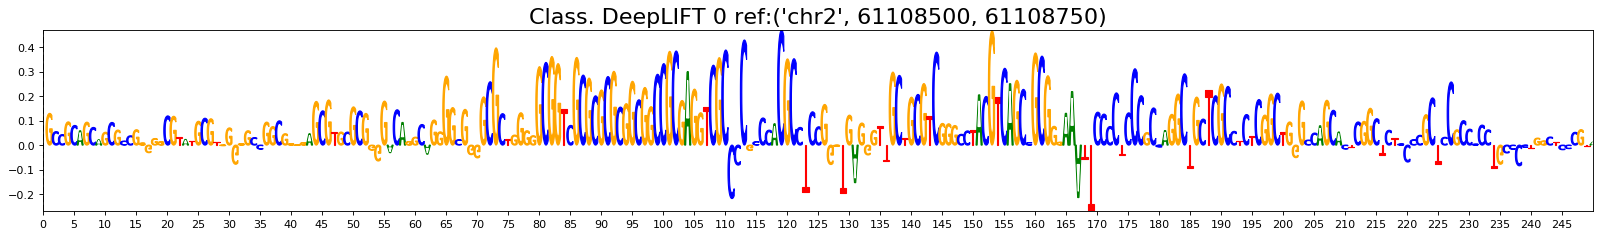

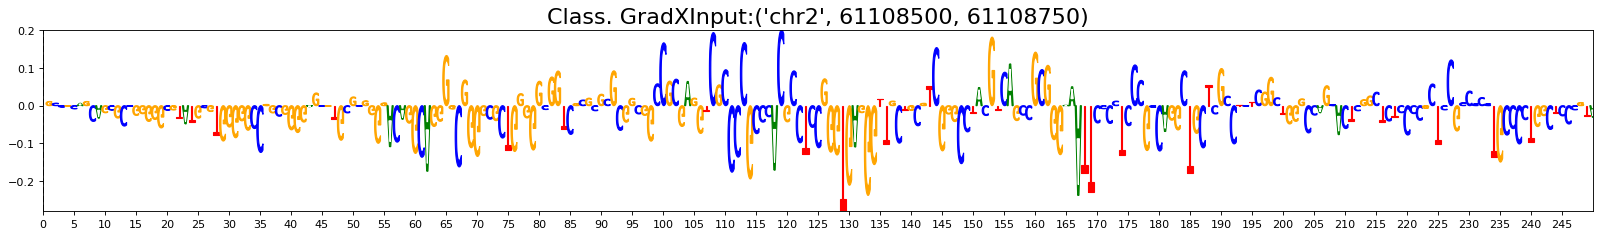

In [135]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(5312)

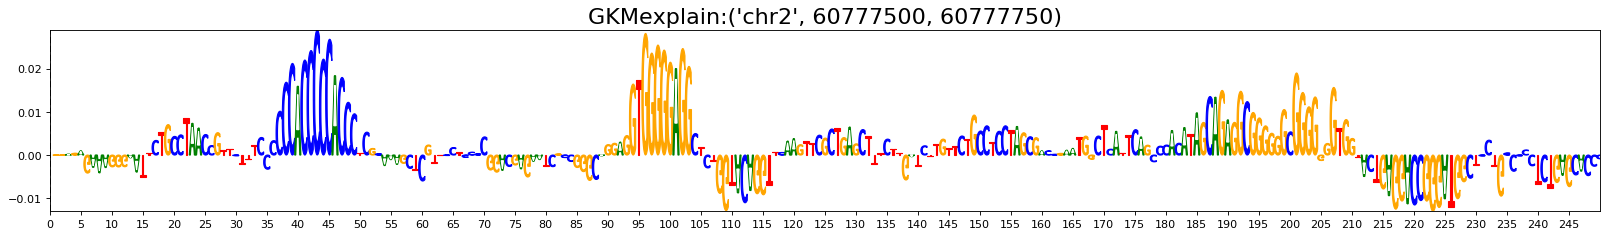

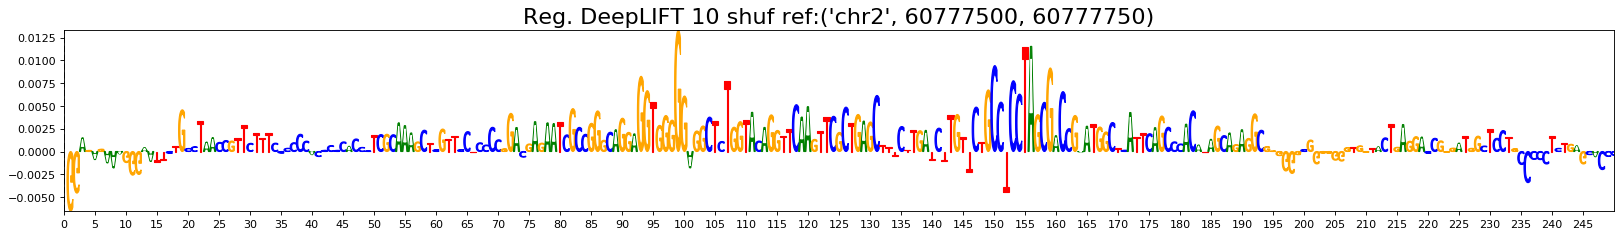

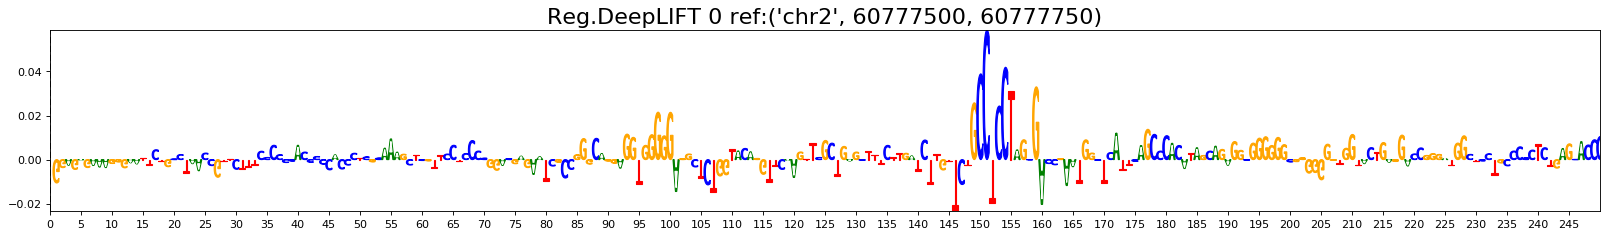

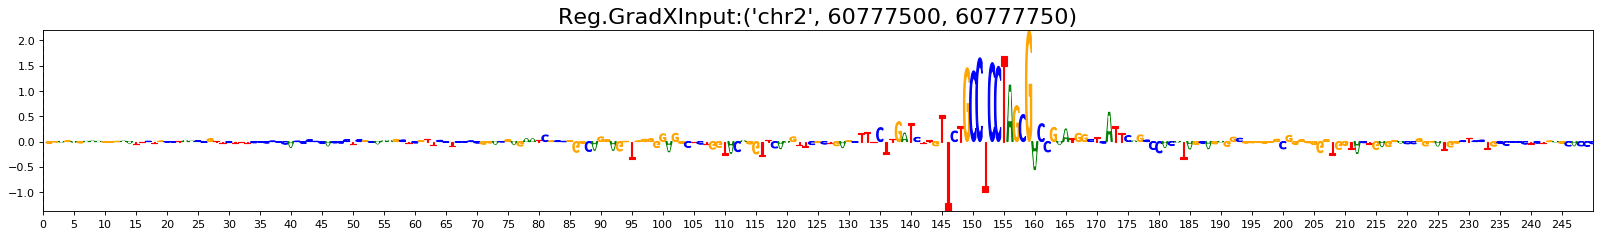

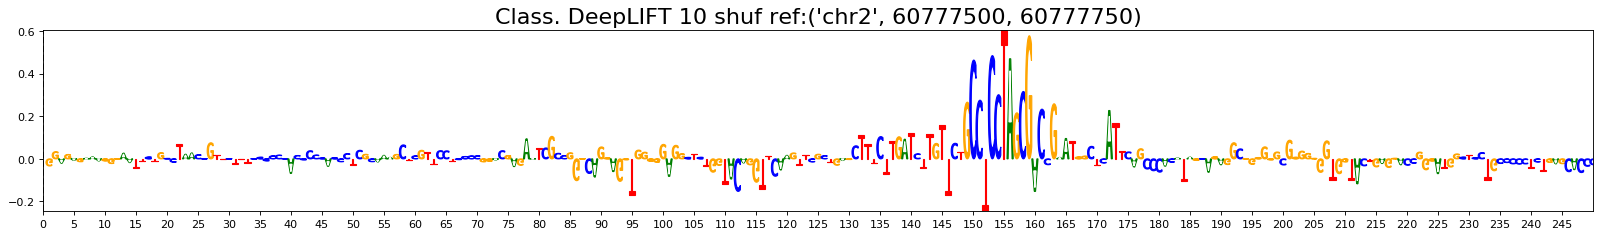

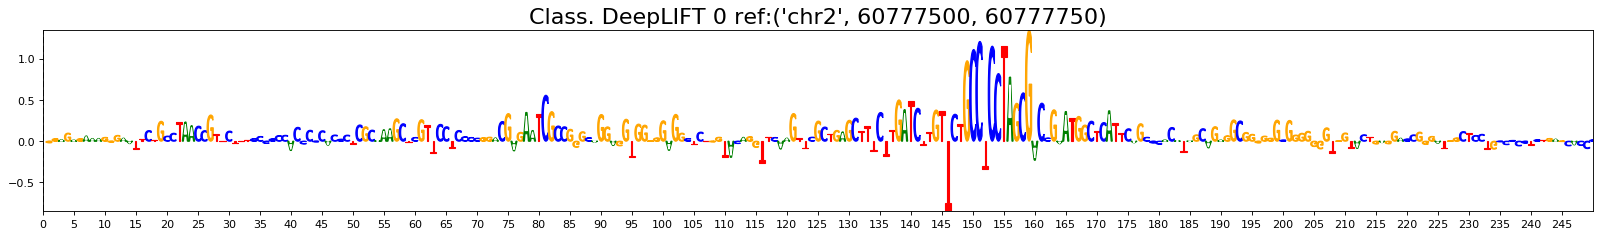

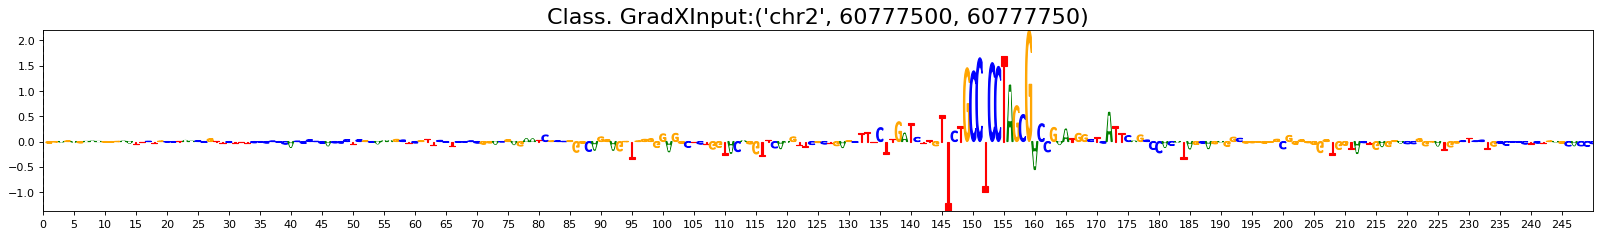

In [136]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(3988)

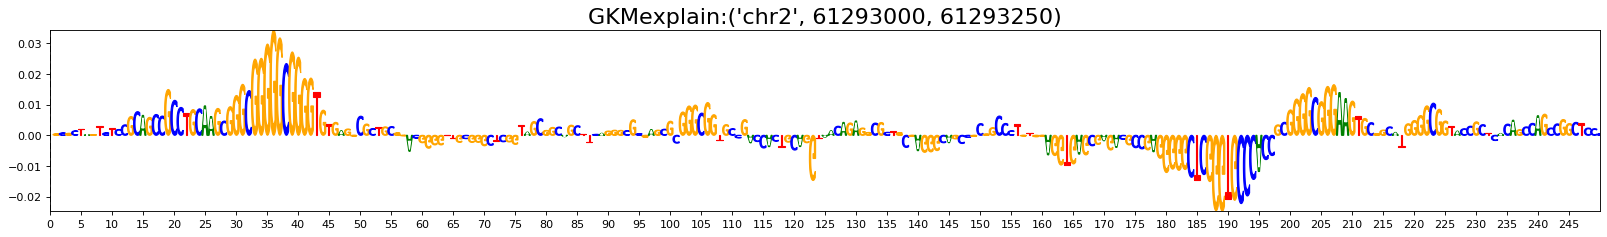

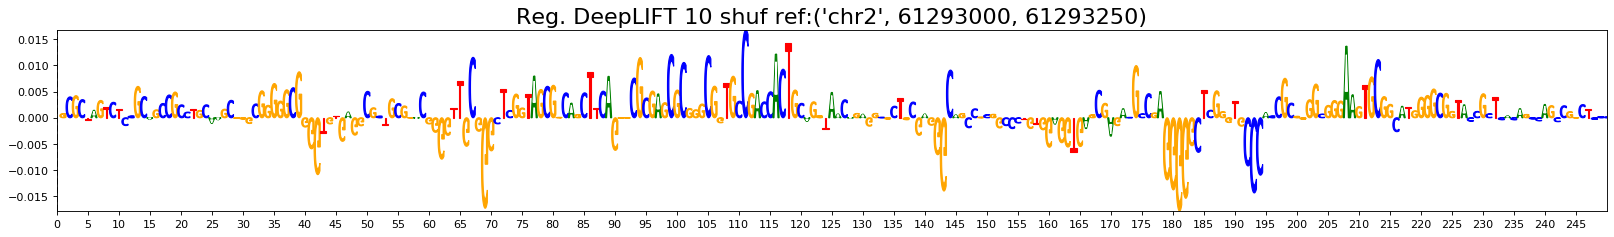

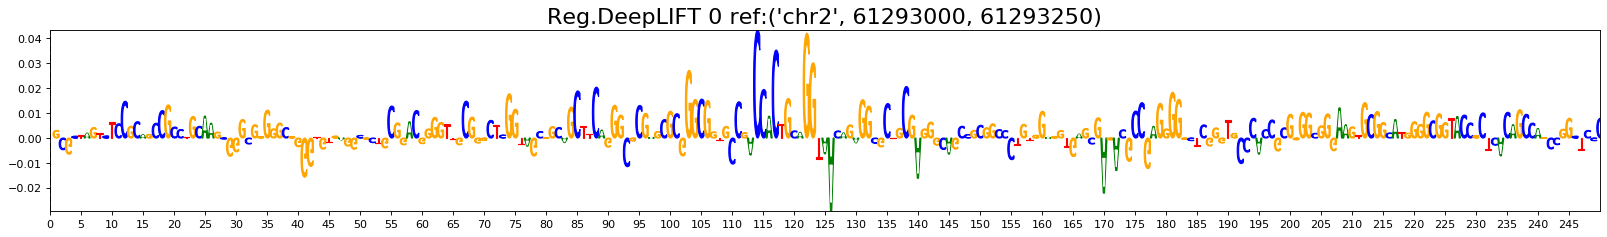

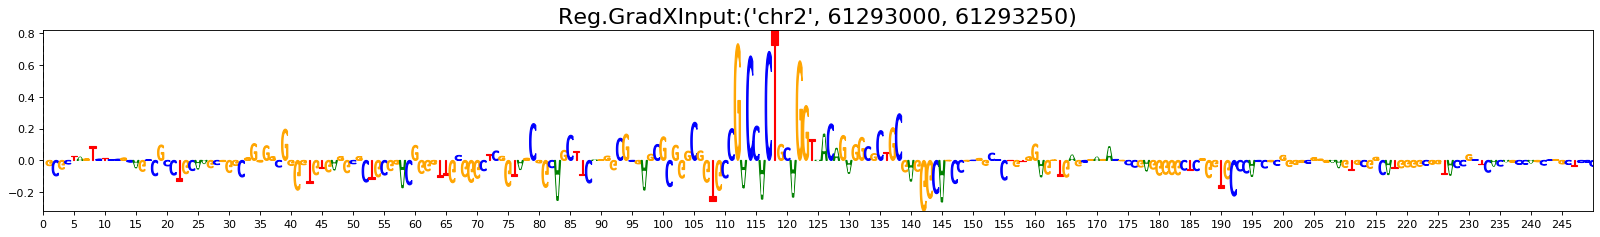

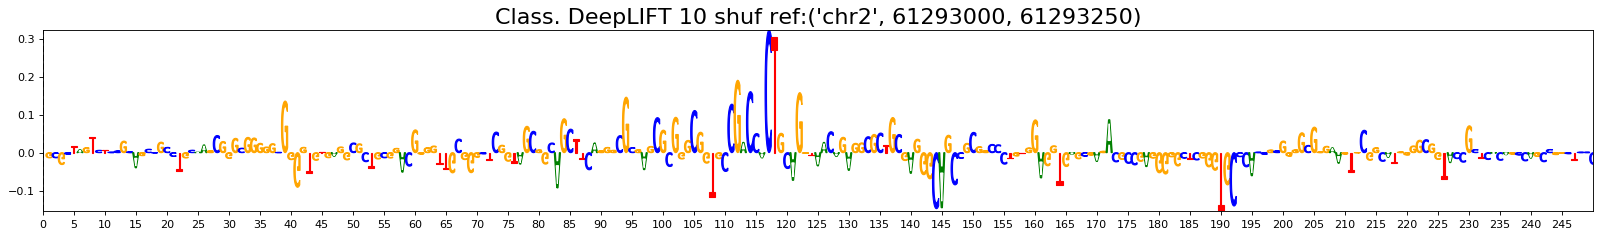

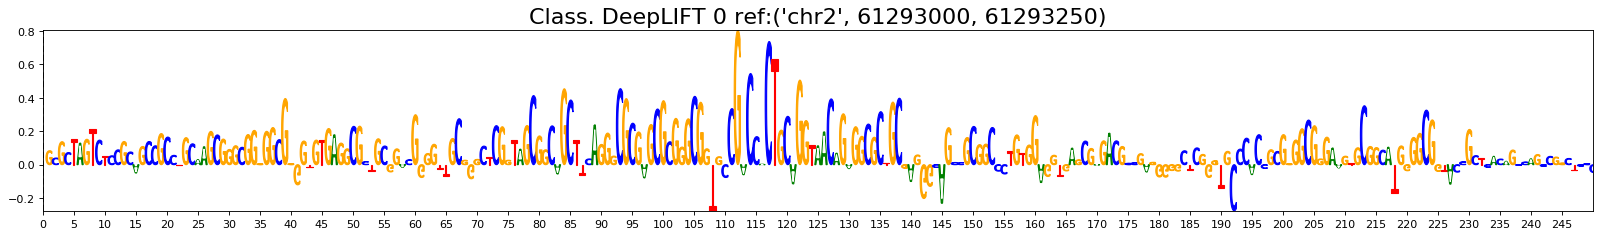

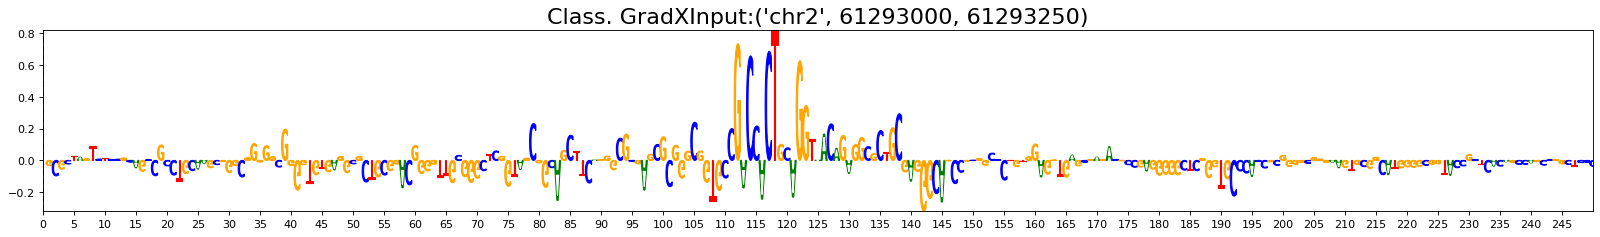

In [137]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(6050)

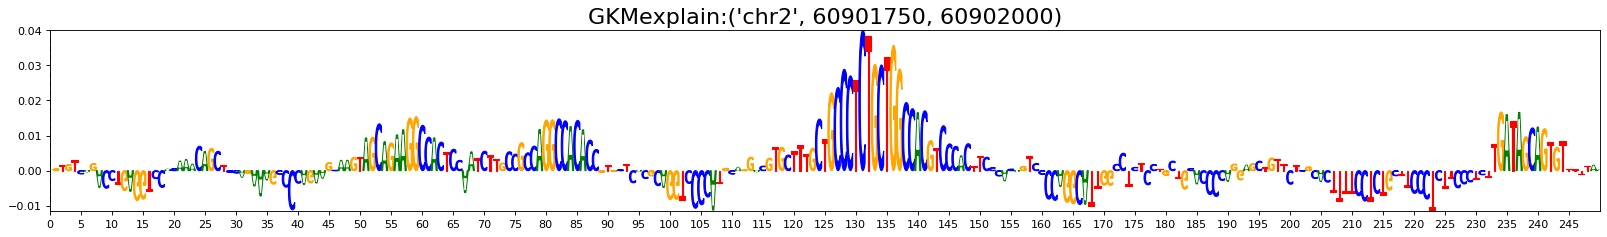

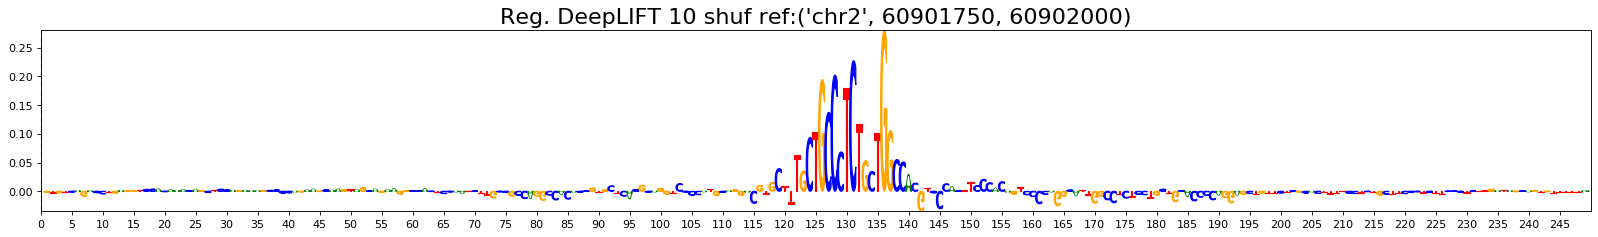

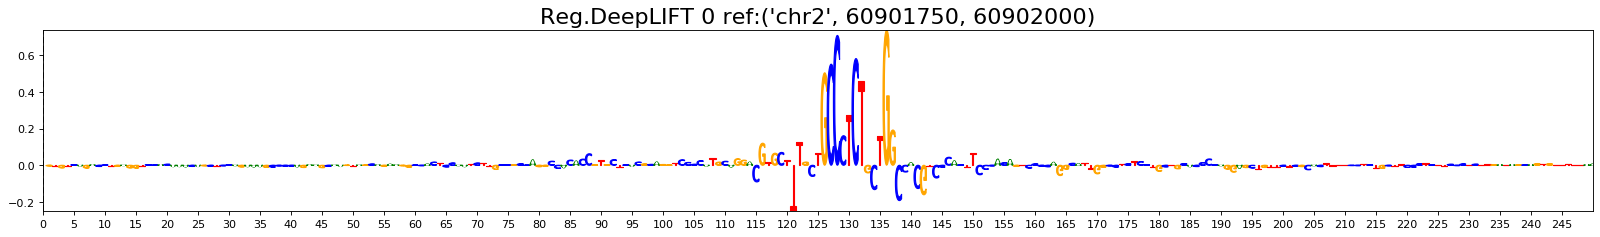

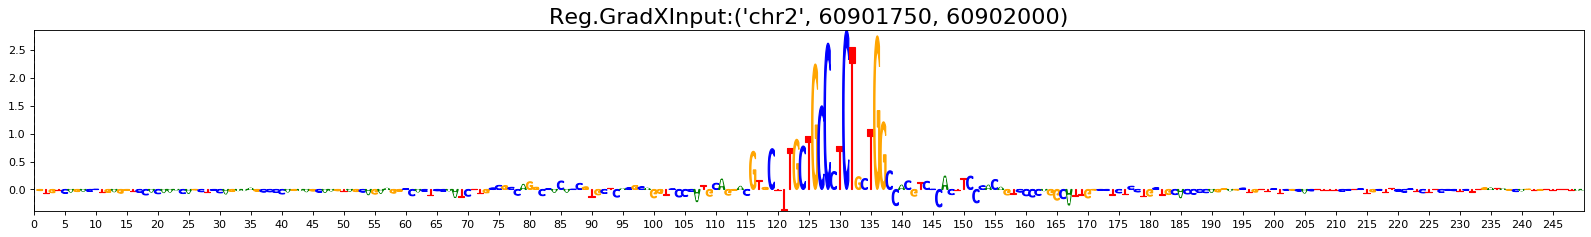

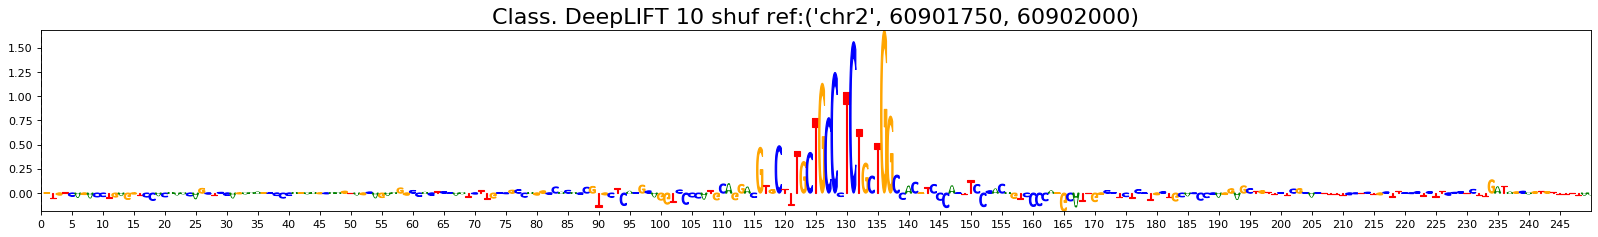

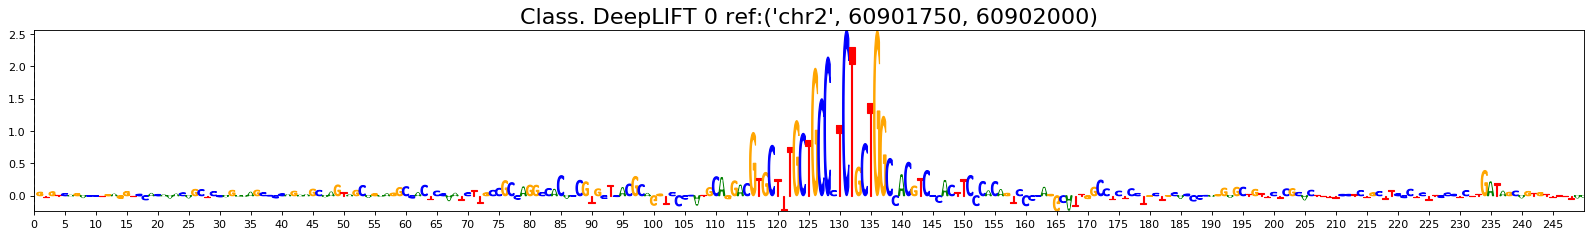

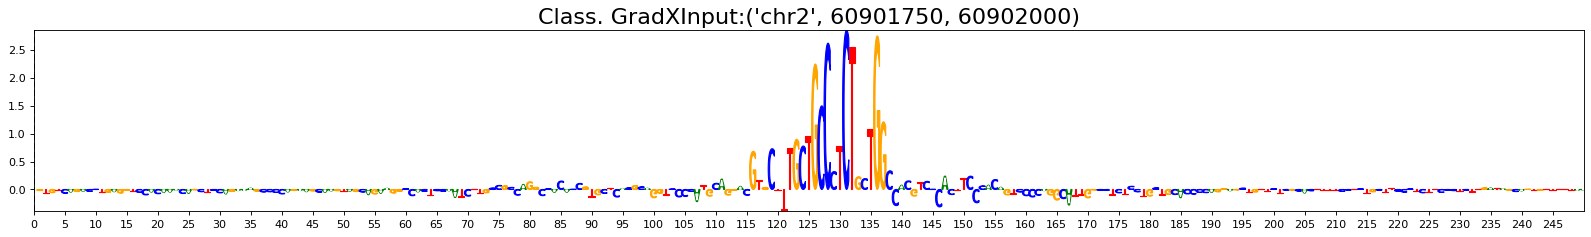

In [138]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(4485)

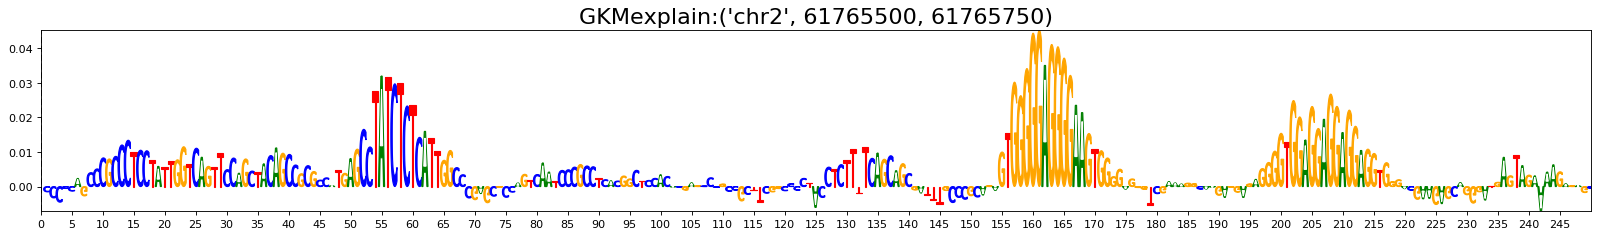

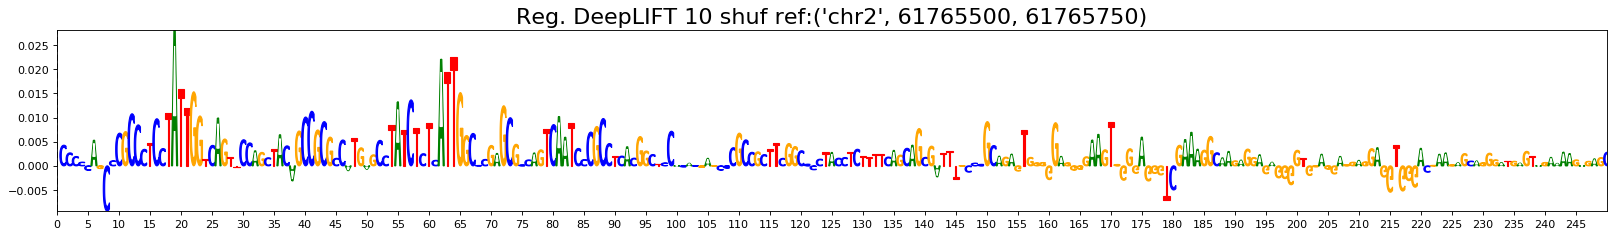

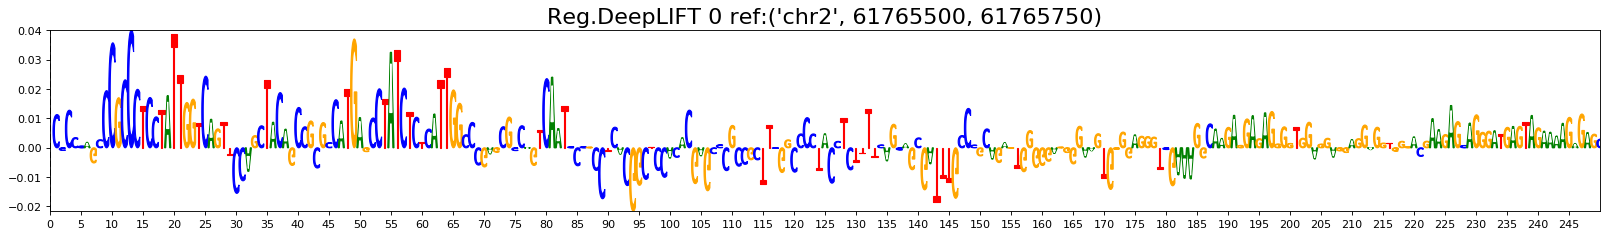

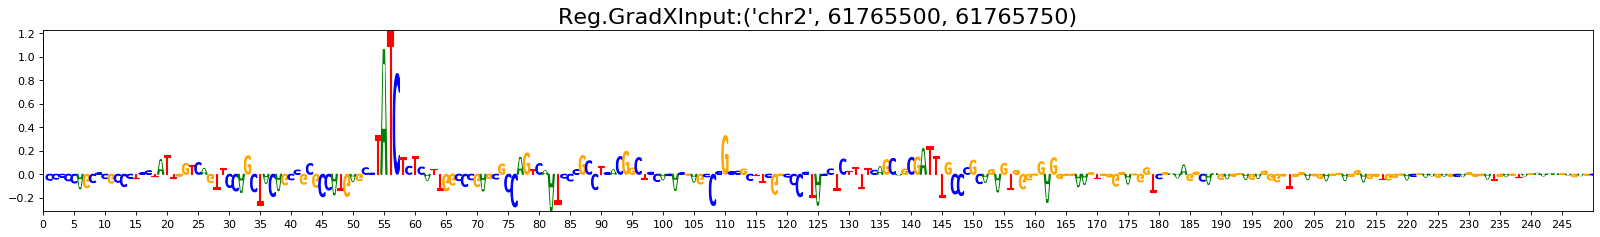

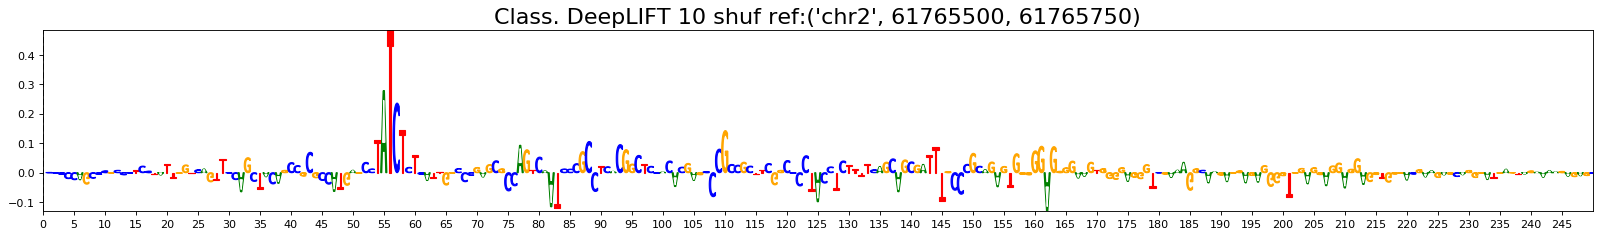

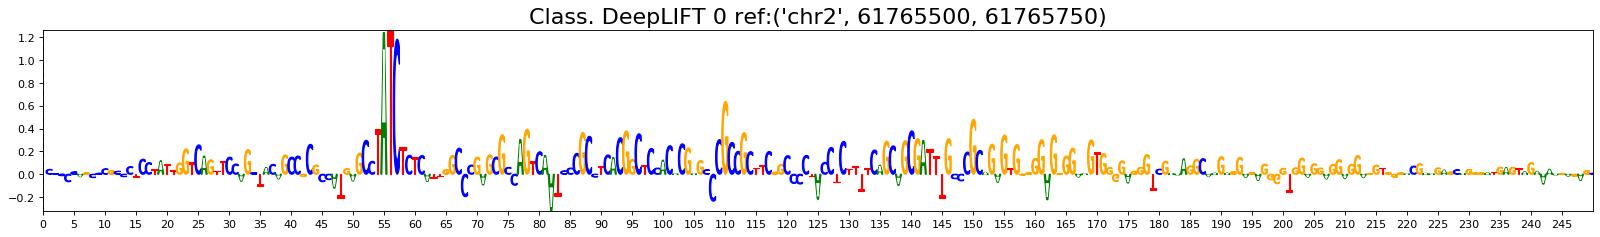

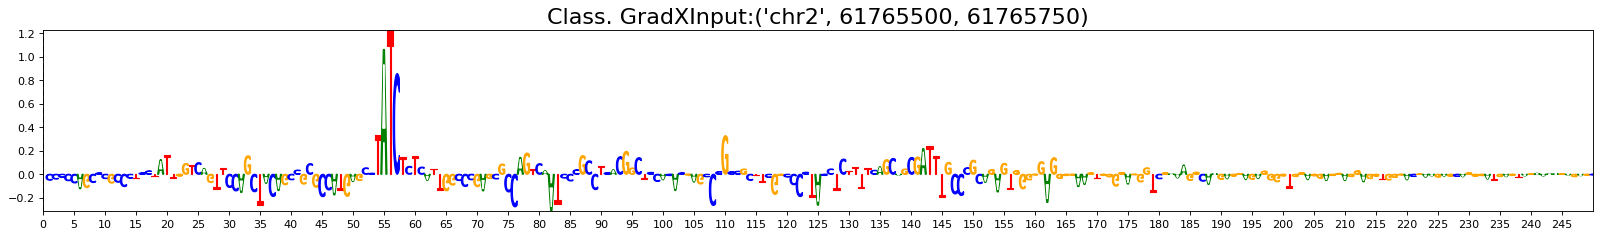

In [139]:
ax1,ax2,ax3,ax4,ax5,ax6,ax7=plot_vals(7940)